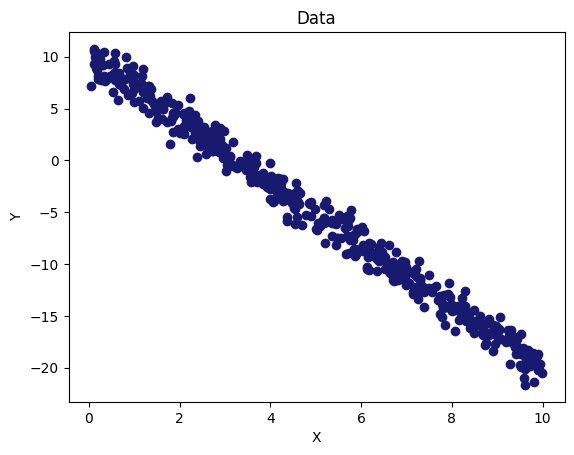

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc

samples = 500
sigma = 1.0

np.random.seed(42)
generator = np.random.RandomState(0)
x = generator.rand(samples) * 10.0
err = generator.normal(0, sigma, samples)

# y = w*x + b + error
y = -3.0 * x + 10.0 + err

plt.scatter(x, y, color = 'midnightblue')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data")
plt.show()

In [ ]:
# Prior belief - w, b follow normal distribution N(0.5, 0.5)
def prior(theta):
    w = theta[0]
    b = theta[1]
    w_prior = sc.norm(0.5, 0.5).pdf(w)
    b_prior = sc.norm(0.5, 0.5).pdf(b)

    # Taking log changes * to +
    # Handle case to avoid log(0 or -ve)
    return np.log(max(w_prior, 0.01)) + np.log(max(b_prior, 0.01))

# Given paramter vector theta, the likehood of seeing x and y (data)
def likelihood(theta):
    w = theta[0]
    b = theta[1]
    y_predict = w*x + b

    single_likelihoods = sc.norm(y_predict, sigma).pdf(y)

    # Handle case to avoid log(0 or -ve)
    single_likelihoods = np.array([0.001 if i == 0 else i for i in single_likelihoods])

    # Taking log of likelihood values
    single_likelihoods = np.log(single_likelihoods)

    # Taking log changes * to +
    return np.sum(single_likelihoods)

# Normalizing constant is canceled out in ratio
def posterior(theta):
    # Taking log changes * to +
    return likelihood(theta) + prior(theta)

# MCMC step to sample next value of theta
def proposeTheta(theta):
    w = theta[0]
    b = theta[1]

    # proposal function (to introduce perturbation) follows normal centered at theta
    w_proposal = np.random.normal(w, 0.5)
    b_proposal = np.random.normal(b, 0.5)
    new_sample = np.array([w_proposal, b_proposal])
    return new_sample

iters = 50000

# set initial values for paramters
theta_history = np.zeros([iters+1, 2])
theta_history[0] = [0.5, 0.5]

for step in range(iters):
    if (step % 5000 == 0): print(step)

    theta_current = theta_history[step]
    theta_proposed = proposeTheta(theta_current)

    # Metropolis hasting algo

    # Taking log changes / to -
    val = posterior(theta_proposed) - posterior(theta_current)
    acceptanceRatio = 1 if (val > 0) else np.exp(val)

    if np.random.uniform(0,1) <= acceptanceRatio:
        # accept sample
        theta_history[step+1] = theta_proposed
    else:
        # reject sample
        theta_history[step+1] = theta_current

burn = int(iters/4)
posterior_samples = theta_history[burn:]

print(posterior_samples.mean(axis = 0))

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
[-2.99460751  9.86949394]


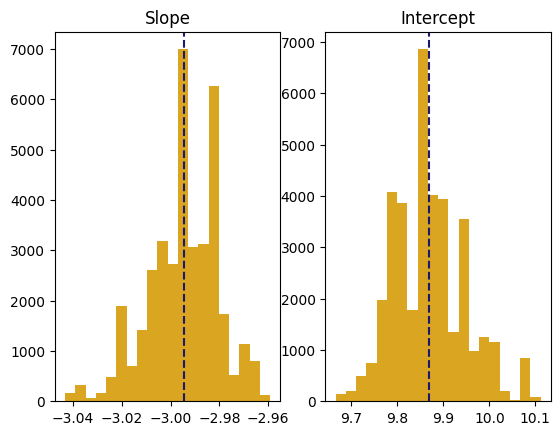

In [ ]:
fig = plt.figure()
f1 = fig.add_subplot(121)
f1.hist(posterior_samples[:, 0], bins=20, color = 'goldenrod')
f1.axvline(posterior_samples.mean(axis=0)[0], color = 'midnightblue', linestyle = 'dashed')
f1.title.set_text('Slope')

f2 = fig.add_subplot(122)
f2.hist(posterior_samples[:, 1], bins=20, color = 'goldenrod')
f2.axvline(posterior_samples.mean(axis=0)[1], color = 'midnightblue', linestyle = 'dashed')
f2.title.set_text('Intercept')

plt.show()

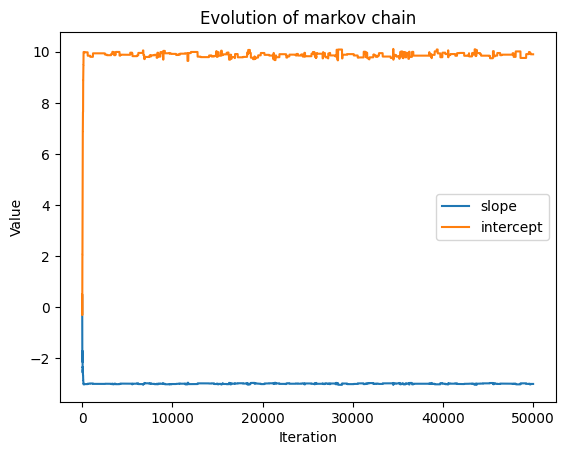

In [ ]:
x = [step for step in range(iters+1)]

slopes = theta_history[:, 0]
plt.plot(x, slopes, label = 'slope')

intercepts = theta_history[:, 1]
plt.plot(x, intercepts, label = 'intercept')

plt.xlabel("Iteration")
plt.ylabel("Value")
plt.title("Evolution of markov chain")

plt.legend()
plt.show()